# Deep Learning Term Project for ECG (DIL700)

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
import os
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from general_functions import *
import pickle
import json
from keras.models import model_from_json
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

## Loading Dataset MIT-BIH

Collect all the data from the csv files

In [3]:
# # Original data

train_df=combine_csv_files_to_df('./Dataset_mitbih/Training/')
test_df=combine_csv_files_to_df('./Dataset_mitbih/Testing/')

# Synthetic data

# train_df = pd.read_csv('./Dataset_mitbih/Synthetic/mitbih_with_syntetic_train.csv')
# train_df = train_df.iloc[:, :-1]
# train_df.rename(columns={'class': 187}, inplace=True)
# test_df = pd.read_csv('./Dataset_mitbih/Synthetic/mitbih_with_syntetic_test.csv')
# test_df = test_df.iloc[:, :-1]
# test_df.rename(columns={'class': 187}, inplace=True)

In [4]:
# train_df = train_df[train_df[187] != 3]
# test_df = test_df[test_df[187] != 3]
# full_df = full_df[full_df[187] != 3]

# train_df = train_df[train_df[187] != '3.0']
# test_df = test_df[test_df[187] != '3.0']
# full_df = full_df[full_df[187] != '3.0']

train_df = train_df[train_df[187] != 'class']
test_df = test_df[test_df[187] != 'class']
# full_df = full_df[full_df[187] != 'class']

# train_df.loc[train_df[187] == 4, 187] = 3.0
# test_df.loc[test_df[187] == 4, 187] = 3.0
# full_df.loc[full_df[187] == 4, 187] = 3.0

# train_df.loc[train_df[187] == '4.0', 187] = 3.0
# test_df.loc[test_df[187] == '4.0', 187] = 3.0
# full_df.loc[full_df[187] == '4.0', 187] = 3.0

train_df.loc[train_df[187] == '0.0', 187] = 0.0
train_df.loc[train_df[187] == '1.0', 187] = 1.0
train_df.loc[train_df[187] == '2.0', 187] = 2.0
train_df.loc[train_df[187] == '3.0', 187] = 3.0
train_df.loc[train_df[187] == '4.0', 187] = 4.0

In [5]:
print(train_df[187].unique())

[0. 1. 2. 3. 4.]


In [6]:
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion', 'Paced']
labels_short =  ["N","S","V",'F',"Q"]

In [7]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
full_df=pd.concat([train_df,test_df],ignore_index=True)
full_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109441,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109442,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109443,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109444,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


## Create feautures and labels for dataset MIT-BIH

Create different dataframes for training/testing data and labels.
Also OneHotEncoding for the labels and renaming the classes

In [9]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=82)

y_train_nn = pd.get_dummies(y_train, columns=[1])
y_train_nn = y_train_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

y_valid_nn = pd.get_dummies(y_valid, columns=[1])
y_valid_nn = y_valid_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]
y_test_nn = pd.get_dummies(y_test, columns=[1])
y_test_nn = y_test_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

# Load first model

In [10]:
# load cnn model with h5 and json file
from keras.models import model_from_json
json_file = open('saved_models/CNN_MITBIH_with_GAN_Data_23032023_113101/CNN_MITBIH_with_GAN_Data.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_1= model_from_json(loaded_model_json)

# Then load the weights
model_1.load_weights("saved_models/CNN_MITBIH_with_GAN_Data_23032023_113101/CNN_MITBIH_with_GAN_Data.h5")

# Check performance for test set

In [11]:
# Predict test set labels
y_pred_1  = model_1.predict(X_test)
y_pred_model_1 = np.argmax(y_pred_1 , axis=1)

print('Accuracy of CNN: ', accuracy_score(y_test, y_pred_model_1))

685/685 [==============================] - 6s 4ms/step
Accuracy of CNN:  0.9887630184542299


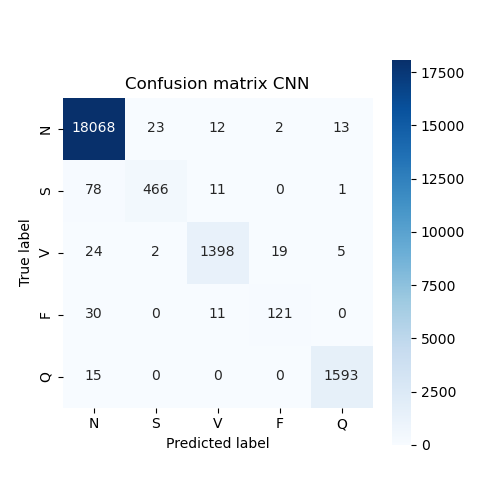

In [12]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_model_1)

# Plot confusion matrix
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix CNN')
ax.xaxis.set_ticklabels(labels_short)
ax.yaxis.set_ticklabels(labels_short)
plt.show()

In [13]:
print(classification_report(y_test, y_pred_model_1, target_names=labels, digits=4))

                                   precision    recall  f1-score   support

                           Normal     0.9919    0.9972    0.9946     18118
                 Artial Premature     0.9491    0.8381    0.8902       556
Premature ventricular contraction     0.9763    0.9655    0.9708      1448
                           Fusion     0.8521    0.7469    0.7961       162
                            Paced     0.9882    0.9907    0.9894      1608

                         accuracy                         0.9888     21892
                        macro avg     0.9515    0.9077    0.9282     21892
                     weighted avg     0.9885    0.9888    0.9885     21892



# Check performance for full dataset

In [14]:
X_full = full_df.iloc[:, :-1]
y_full = full_df.iloc[:, -1]

y_full_nn = pd.get_dummies(y_full, columns=[1])
y_full_nn = y_full_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

In [15]:
# Predict test set labels
y_pred_2  = model_1.predict(X_full)
y_pred_model_2 = np.argmax(y_pred_2 , axis=1)
# Y_full to ndarray and integer
y_full = y_full.astype(int)

print('Accuracy of CNN: ', accuracy_score(y_full, y_pred_model_2))

3421/3421 [==============================] - 11s 3ms/step
Accuracy of CNN:  0.9896204520950971


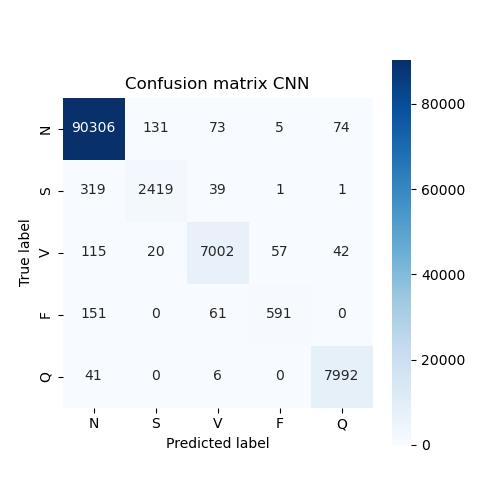

In [16]:
# Calculate confusion matrix
cm = confusion_matrix(y_full, y_pred_model_2)

# Plot confusion matrix
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix CNN')
ax.xaxis.set_ticklabels(labels_short)
ax.yaxis.set_ticklabels(labels_short)
plt.show()

In [17]:
print(classification_report(y_full, y_pred_model_2, target_names=labels, digits=4))

                                   precision    recall  f1-score   support

                           Normal     0.9931    0.9969    0.9950     90589
                 Artial Premature     0.9412    0.8705    0.9045      2779
Premature ventricular contraction     0.9751    0.9677    0.9714      7236
                           Fusion     0.9037    0.7360    0.8113       803
                            Paced     0.9856    0.9942    0.9898      8039

                         accuracy                         0.9896    109446
                        macro avg     0.9597    0.9130    0.9344    109446
                     weighted avg     0.9894    0.9896    0.9894    109446



In [18]:
# Calculate false positive rate for each class
num_classes = cm.shape[0]
false_positive_rates = []
for i in range(num_classes):
    false_positives = np.sum(cm[:, i]) - cm[i, i]
    actual_negatives = np.sum(cm) - np.sum(cm[:, i]) - np.sum(cm[i, :]) + cm[i, i]
    false_positive_rate = false_positives / actual_negatives
    false_positive_rates.append(false_positive_rate)

# Print results
for i in range(num_classes):
    print(f"False Positive Rate (Class {i+1}): {false_positive_rates[i]:.4f}")


False Positive Rate (Class 1): 0.0343
False Positive Rate (Class 2): 0.0014
False Positive Rate (Class 3): 0.0018
False Positive Rate (Class 4): 0.0006
False Positive Rate (Class 5): 0.0012
